In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold,LeaveOneOut

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix

from sklearn.decomposition import PCA 
from sklearn.feature_selection import mutual_info_classif,chi2,SelectKBest
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
categorical_data =['gender','smoking_history','diabetes']
numerical_data = ["age",'hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']

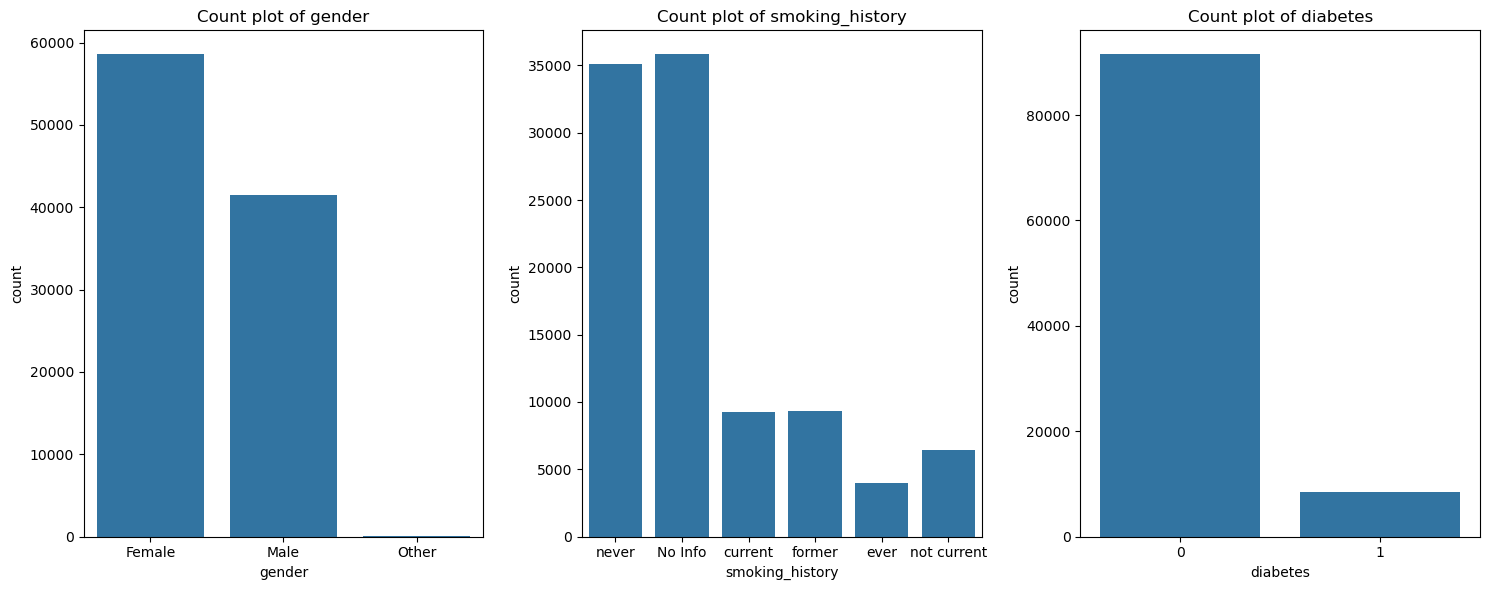

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
for i,col in enumerate(categorical_data):
    axs=ax[i%3]
    sns.countplot(x=df[col],ax=axs)
    axs.set_title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

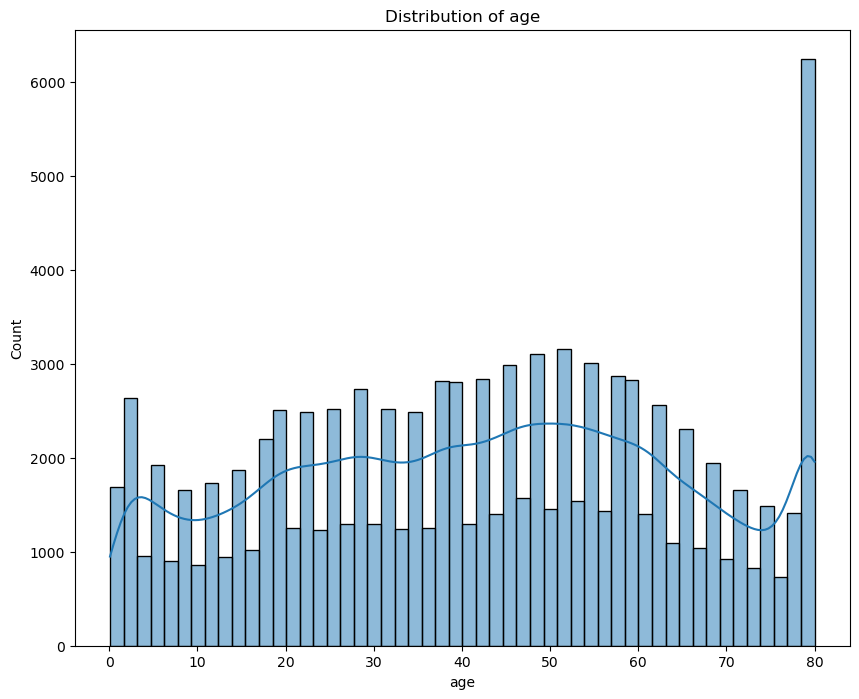

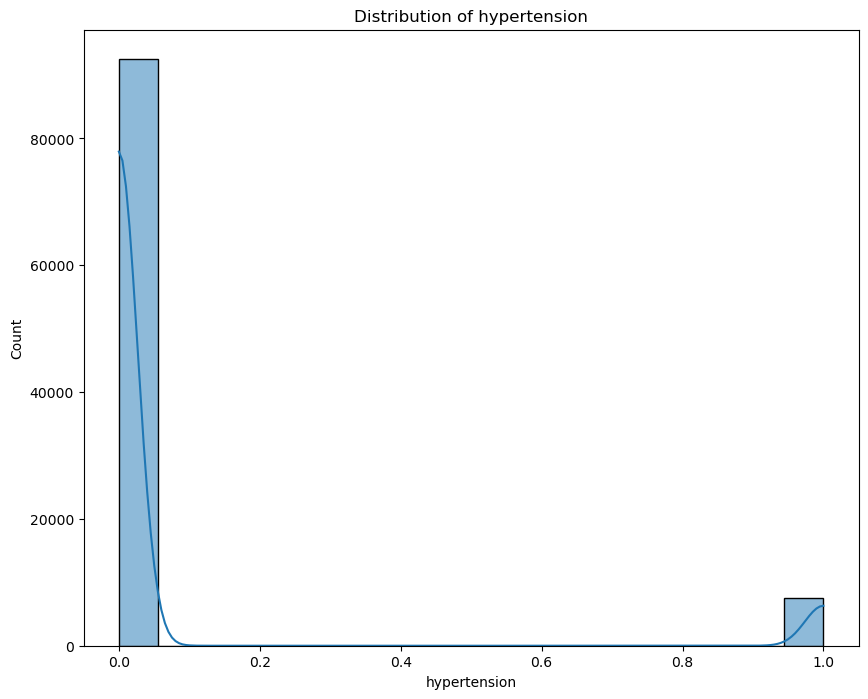

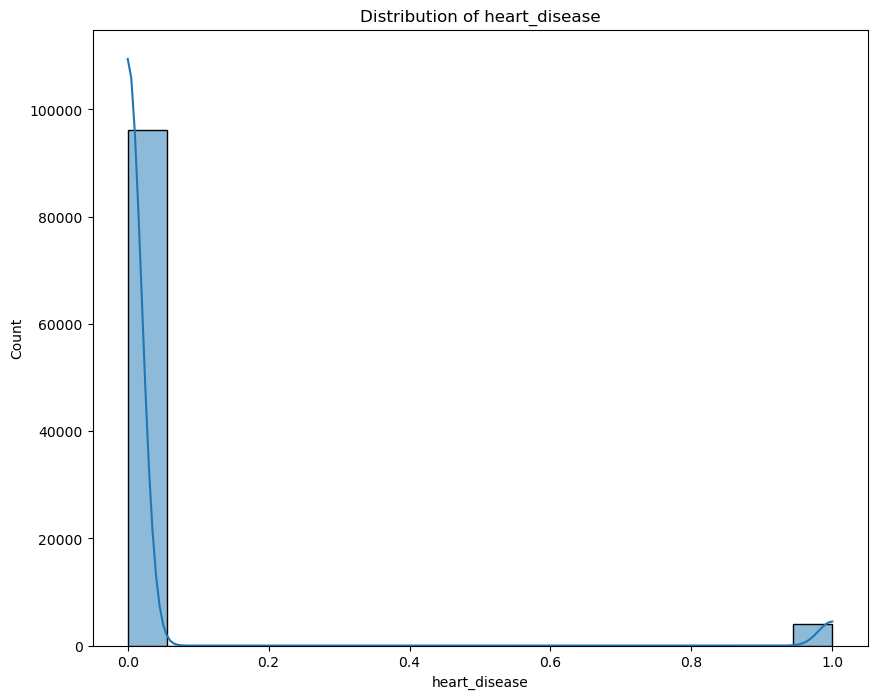

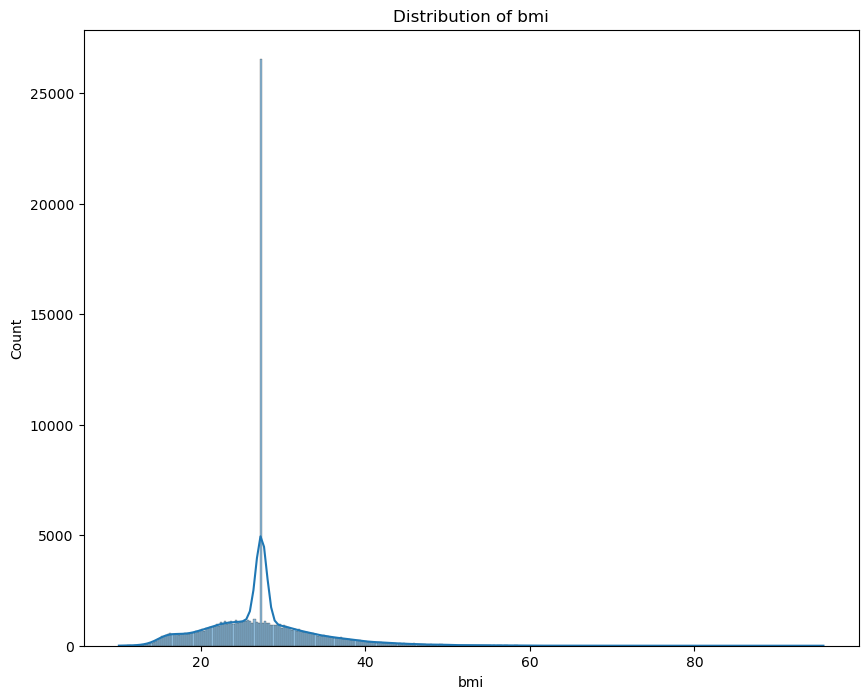

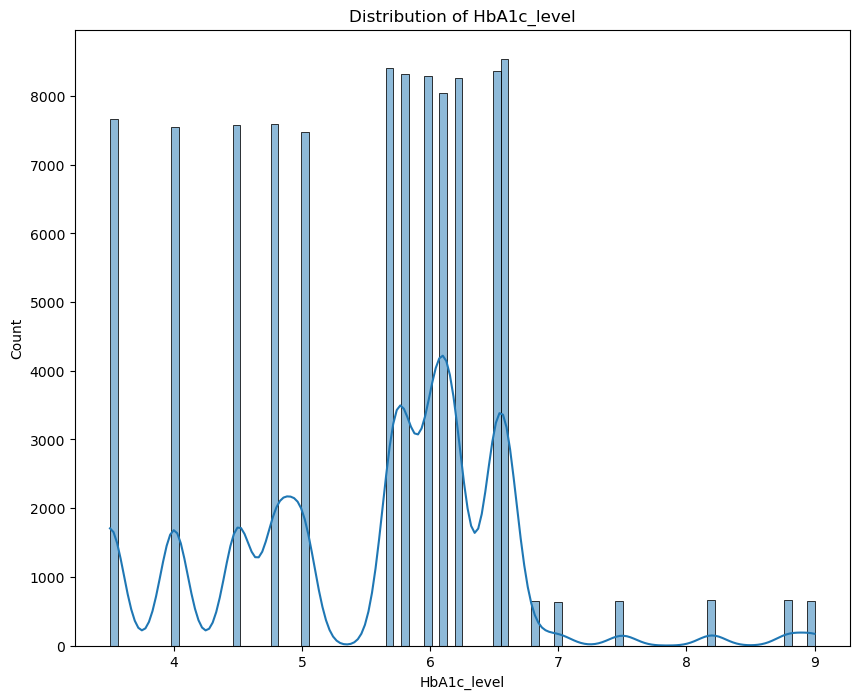

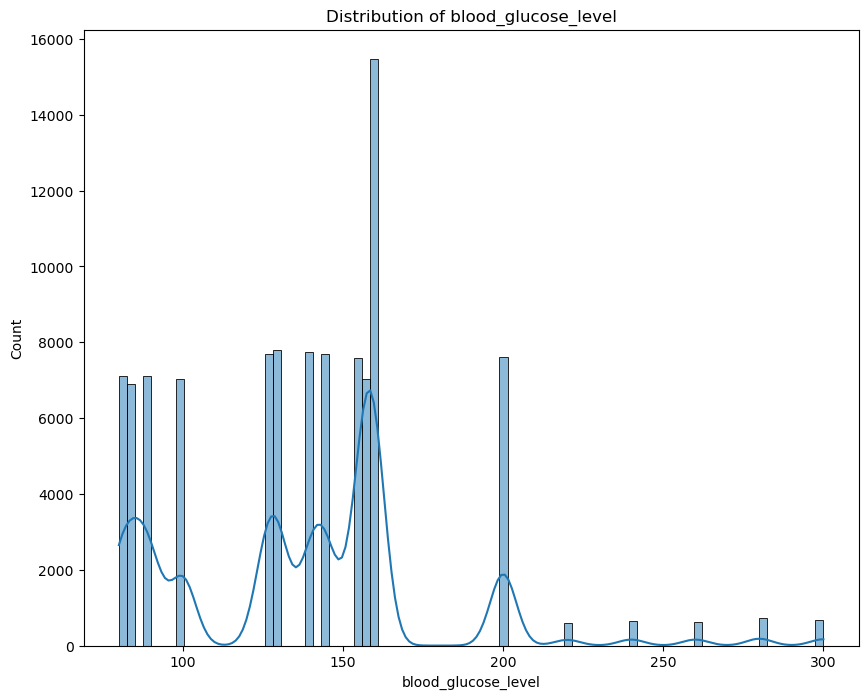

In [ ]:
for i in numerical_data:
    fig,ax=plt.subplots(figsize=(10,8))
    sns.histplot(x=df[i],kde=True)
    plt.title(f"Distribution of {i}")
plt.show()

In [7]:
label=LabelEncoder()

df['gender']=label.fit_transform(df['gender'])
df['smoking_history']=label.fit_transform(df['smoking_history'])

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.corr()['diabetes'].sort_values()

gender                 0.037411
smoking_history        0.094290
heart_disease          0.171727
hypertension           0.197823
bmi                    0.214357
age                    0.258008
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

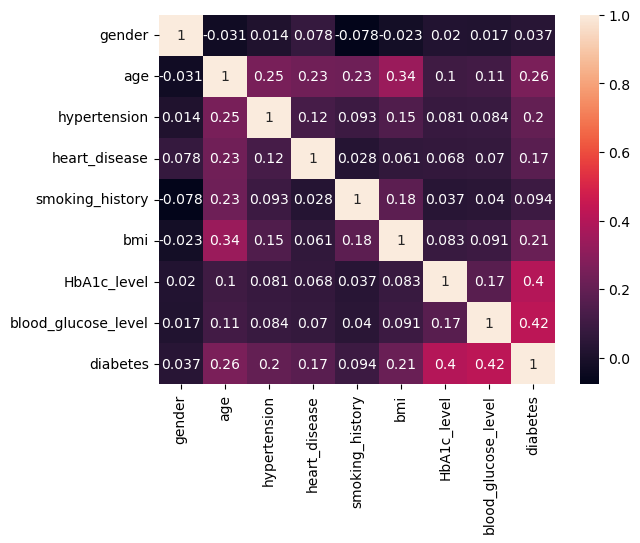

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
x=df.drop('diabetes',axis=1)
y=df['diabetes']

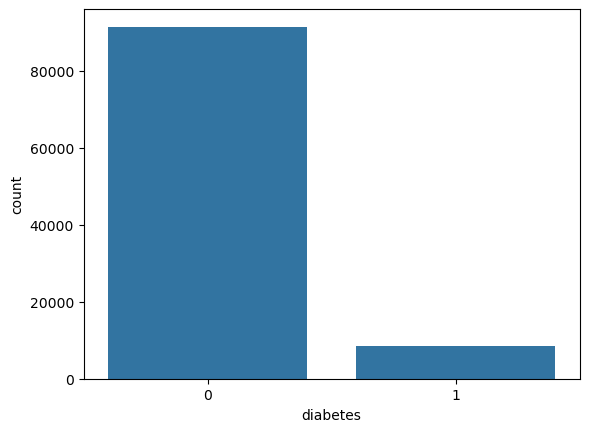

In [ ]:
sns.countplot(x=df['diabetes'])
plt.show()

In [13]:
sampler = SMOTE()
x_sample,y_sample = sampler.fit_resample(x,y)

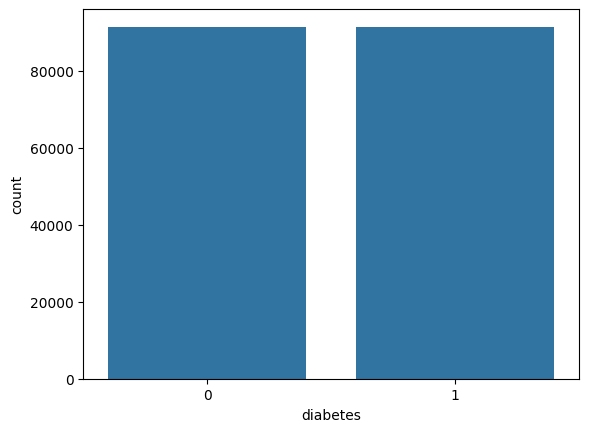

In [14]:
sns.countplot(x=y_sample)
plt.show()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.20,random_state=20)

In [ ]:
models={
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'xgb':XGBClassifier(),
    'GradientBoost':GradientBoostingClassifier()
}

param_grid={
    'DecisionTree':{
        'max_depth':[5,10,15],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,5]
    },
    'RandomForest':{
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoost':{
        'n_estimators': [50,100,150],
        'learning_rate':[0.1,0.5,1,2]
    },
    'xgb':{
        'n_estimators': [50,100,150],
        'max_depth': [3, 5, 7],
        'learning_rate':[0.1,0.5,1,2],
        'gamma':[0.01,0.5,1,2],
    },
    'GradientBoost':{
        'n_estimators': [50,100,150],
        'max_depth': [3, 5, 7],
        'learning_rate':[0.1,0.5,1,2],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }
        
}

def train_model_Evaluate(models,param_grid,x_train,x_test,y_train,y_test):
    grid=GridSearchCV(models,param_grid,cv=5,n_jobs=-1,verbose=2)
    grid.fit(x_train,y_train)
    best_model=grid.best_estimator_
    
    ypred=best_model.predict(x_test)
    
    accuracy=accuracy_score(y_test,ypred)
    precision=precision_score(y_test,ypred)
    recall=recall_score(y_test,ypred)
    roc_auc=roc_auc_score(y_test,ypred)
    f1score=f1_score(y_test,ypred)
    
    return {
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'roc_auc':roc_auc,
        'f1score':f1score,
        'best param':grid.best_params_
    }

### **making a hyperparamter tuning**

In [ ]:
result={}

for model_name,model in models.items():
    result[model_name]=train_model_Evaluate(model,param_grid[model_name],x_train,x_test,y_train,y_test)
print(result)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'DecisionTree': {'accuracy': 0.9591803278688524, 'precision': 0.9794555726759117, 'recall': 0.9380226266601082, 'roc_auc': 0.9591768599617537, 'f1score': 0.9582914572864322, 'best param': {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}}, 'RandomForest': {'accuracy': 0.9747814207650273, 'precision': 0.9749589939857846, 'recall': 0.9745859977045417, 'roc_auc': 0.9747813887337111, 'f1score': 0.974772460163446, 'best param': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}}, 'AdaBoost': {'accuracy': 0.9690983606557377, 'precision': 0.9851345240786796, 'recall': 0.9525605290484779, 'roc_auc': 0.9690956499801751, 'f1score': 0.9685737308622079, 'best pa

In [ ]:
# I will upload a notebook for a machin learning task, analysis each cell and make a follow below instraction:
# make a markdown cells in vscode that aim me to discover notebook that contain a:
# 1- headline of project 
# 2- breif about project and techonlogy i use it
# 3- table of content 
# content contian data exploration, visualization, preprocessing, modeling, testing
# when you are finish make a document as a report 

In [ ]:
result['AdaBoost']

{'accuracy': 0.9690983606557377,
 'precision': 0.9851345240786796,
 'recall': 0.9525605290484779,
 'roc_auc': 0.9690956499801751,
 'f1score': 0.9685737308622079,
 'best param': {'learning_rate': 1, 'n_estimators': 150}}

In [ ]:
result['DecisionTree']

{'accuracy': 0.9591803278688524,
 'precision': 0.9794555726759117,
 'recall': 0.9380226266601082,
 'roc_auc': 0.9591768599617537,
 'f1score': 0.9582914572864322,
 'best param': {'max_depth': 15,
  'min_samples_leaf': 2,
  'min_samples_split': 5}}

In [ ]:
result['GradientBoost']

{'accuracy': 0.9777595628415301,
 'precision': 0.9868018043102968,
 'recall': 0.9684647756462809,
 'roc_auc': 0.9777580393556762,
 'f1score': 0.9775473051249517,
 'best param': {'learning_rate': 0.5,
  'max_depth': 7,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100}}

In [ ]:
result['RandomForest']

{'accuracy': 0.9747814207650273,
 'precision': 0.9749589939857846,
 'recall': 0.9745859977045417,
 'roc_auc': 0.9747813887337111,
 'f1score': 0.974772460163446,
 'best param': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 300}}

In [ ]:
result['xgb']

{'accuracy': 0.975136612021858,
 'precision': 0.9854263219610252,
 'recall': 0.964529704323113,
 'roc_auc': 0.9751348734695388,
 'f1score': 0.9748660443020494,
 'best param': {'gamma': 0.01,
  'learning_rate': 0.5,
  'max_depth': 7,
  'n_estimators': 150}}

In [16]:
model = GradientBoostingClassifier(learning_rate=0.5,
                                   max_depth=7,
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   n_estimators=100)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)



In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18303
           1       0.99      0.97      0.98     18297

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



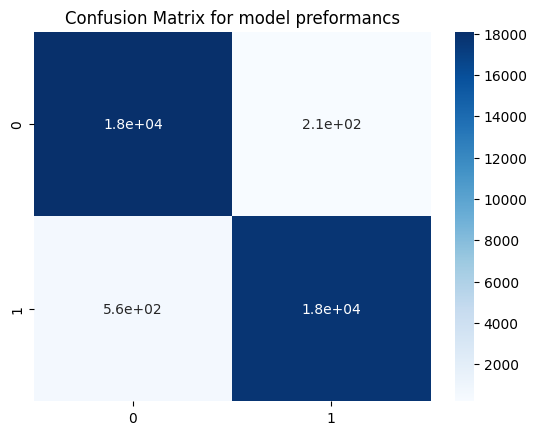

In [18]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Blues")
plt.title("Confusion Matrix for model preformancs")
plt.show()